## Convolutional autoencoder



Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [81]:
import os
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import glob
import cv2 as cv
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from keras.callbacks import TensorBoard

In [82]:
import glob
import cv2 as cv

path = glob.glob("./roof_images/*.jpg")
cv_img = []
for img in path:
    n = cv.imread(img)
    cv_img.append(n)

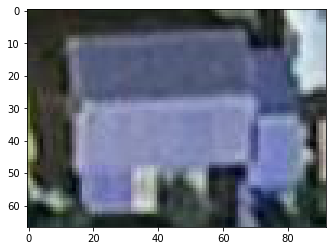

In [83]:
plt.imshow(cv_img[1000])

In [84]:
## Using resized images

In [85]:
import glob
import cv2 as cv

path = glob.glob("E:/alaki/resized/roof_images/*.jpg")
resized_images = []
for img in path:
    n = cv.imread(img)
    resized_images.append(n)

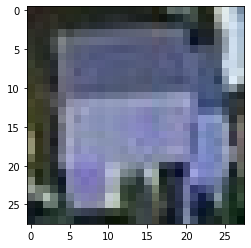

In [86]:
plt.imshow(resized_images[1000])

In [87]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 3))  


x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)



decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [88]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0   

In [89]:
import numpy as np
resized_images=np.array(resized_images)


In [90]:
x_train, x_test = train_test_split(resized_images, test_size=0.30)

In [91]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 3))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 3)) 

Let's train this model for 50 epochs. For the sake of demonstrating how to visualize the results of a model during training, we will be using the TensorFlow backend and the TensorBoard callback.

First, let's open up a terminal and start a TensorBoard server that will read logs stored at /tmp/autoencoder.

tensorboard --logdir=/tmp/autoencoder



Then let's train our model. In the callbacks list we pass an instance of the TensorBoard callback. After every epoch, this callback will write logs to /tmp/autoencoder, which can be read by our TensorBoard server

In [92]:


autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='\\tmp\\autoencoder')])

Train on 29931 samples, validate on 12828 samples
Epoch 1/50
29931/29931 [==============================] - 241s 8ms/step - loss: 0.6543 - val_loss: 0.6349
Epoch 2/50
29931/29931 [==============================] - 236s 8ms/step - loss: 0.6317 - val_loss: 0.6274
Epoch 3/50
29931/29931 [==============================] - 237s 8ms/step - loss: 0.6256 - val_loss: 0.6192
Epoch 4/50
29931/29931 [==============================] - 239s 8ms/step - loss: 0.6218 - val_loss: 0.6165
Epoch 5/50
29931/29931 [==============================] - 237s 8ms/step - loss: 0.6192 - val_loss: 0.6163
Epoch 6/50
29931/29931 [==============================] - 238s 8ms/step - loss: 0.6168 - val_loss: 0.6149
Epoch 7/50
29931/29931 [==============================] - 236s 8ms/step - loss: 0.6149 - val_loss: 0.6121
Epoch 8/50
29931/29931 [==============================] - 236s 8ms/step - loss: 0.6139 - val_loss: 0.6115
Epoch 9/50
29931/29931 [==============================] - 235s 8ms/step - loss: 0.6127 - val_loss: 0.6

In [93]:
decoded_imgs = autoencoder.predict(x_test)


<function matplotlib.pyplot.show(*args, **kw)>

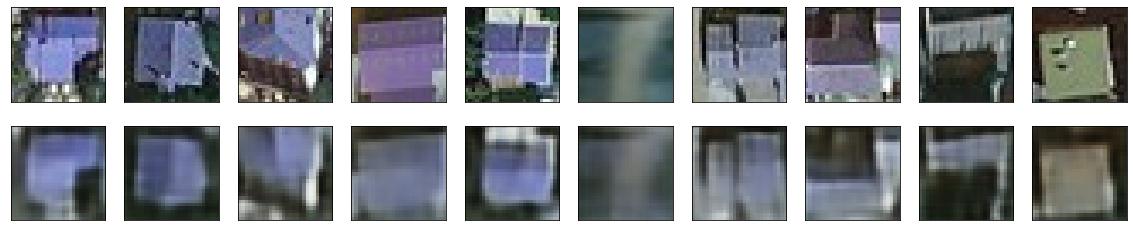

In [94]:

import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show

average cross-entropy = 0.61467767
average cross-entropy = 0.5602313
average cross-entropy = 0.62051624
average cross-entropy = 0.6434007
average cross-entropy = 0.5841105
average cross-entropy = 0.6330542
average cross-entropy = 0.63507384
average cross-entropy = 0.6091922
average cross-entropy = 0.535275
average cross-entropy = 0.5661938


<function matplotlib.pyplot.show(*args, **kw)>

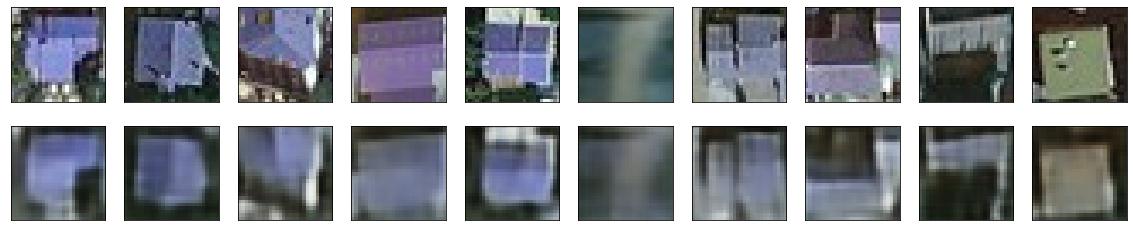

In [95]:

import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    print("average cross-entropy =", np.mean(tf.losses.binary_crossentropy(x_test[i], decoded_imgs[i])))
    
    
    
plt.show

In [96]:
for lll in range(len(x_test)):
    print(np.mean(tf.losses.binary_crossentropy(x_test[lll], decoded_imgs[lll])))
    
    

0.61467767
0.5602313
0.62051624
0.6434007
0.5841105
0.6330542
0.63507384
0.6091922
0.535275
0.5661938
0.64466226
0.54925823
0.5985761
0.65021753
0.6050956
0.4533468
0.62664765
0.5481987
0.60428464
0.640898
0.58590066
0.6070277
0.58199877
0.67519736
0.55305964
0.5469811
0.56743747
0.58849895
0.5500177
0.56987983
0.55782366
0.6264888
0.5982196
0.5995899
0.5927306
0.56995654
0.60924447
0.59865385
0.49014756
0.59513575
0.49154794
0.6409042
0.60473853
0.6082637
0.62990797
0.60768026
0.56744826
0.6205053
0.6164392
0.6094205
0.45265347
0.5798907
0.6147153
0.5459771
0.63502765
0.6304824
0.5964265
0.5729874
0.6325706
0.65370834
0.61233443
0.606073
0.596903
0.6392242
0.56356937
0.62333316
0.59458715
0.59154004
0.66167855
0.6505243
0.5557862
0.62730527
0.5775006
0.5478757
0.6048805
0.5989963
0.6028636
0.577046
0.60704184
0.61458737
0.61026126
0.6340667
0.68640757
0.60477996
0.6291613
0.5857063
0.5235702
0.5908912
0.6127781
0.6153189
0.6209183
0.58131605
0.6313398
0.6164718
0.6264695
0.61280197
0.

0.6033673
0.58771
0.6277252
0.50924146
0.5392857
0.61222893
0.60040325
0.49539194
0.60595745
0.62843776
0.6260743
0.5727671
0.6534775
0.5950015
0.50447243
0.6258612
0.6180746
0.6144356
0.60304123
0.60712856
0.59039515
0.5585636
0.6079024
0.6037679
0.6566717
0.6591401
0.6304517
0.6152297
0.56855434
0.6416557
0.6344032
0.55068696
0.6342855
0.48311168
0.64889604
0.54225135
0.6236821
0.5627502
0.6054461
0.5821794
0.6163046
0.6199867
0.57789165
0.6478469
0.55812323
0.636875
0.59559065
0.6219523
0.5877427
0.5896096
0.5500851
0.6032049
0.5954266
0.6385041
0.5807239
0.6341872
0.5837763
0.60740995
0.6475457
0.55931646
0.6471159
0.60238117
0.62014973
0.5970582
0.58729833
0.6051954
0.63351595
0.6133295
0.6210681
0.5886058
0.63824415
0.6485795
0.6182398
0.6176051
0.6131234
0.62881345
0.62266994
0.54508233
0.65209
0.6272338
0.47881114
0.6078207
0.5705674
0.6389495
0.58963
0.62691665
0.5778919
0.61091715
0.6427982
0.5952647
0.63100713
0.6290922
0.5942588
0.63103724
0.58196026
0.6460179
0.4990456
0.6

0.62804544
0.60687387
0.6173818
0.6150679
0.63450605
0.60914993
0.57910514
0.6564674
0.62332475
0.62823474
0.62315696
0.60645056
0.6034417
0.59824485
0.6118631
0.5930513
0.6013467
0.6302735
0.61660117
0.63693166
0.4981684
0.5949382
0.60633063
0.3129424
0.6148362
0.65873575
0.60077226
0.61951566
0.6006246
0.5731508
0.58383745
0.60247743
0.6324692
0.57527333
0.6352491
0.6125463
0.5590989
0.6429861
0.57546335
0.6381804
0.6241448
0.61947125
0.614518
0.5868899
0.6210352
0.5948584
0.6128492
0.6132728
0.6197873
0.6185351
0.41912192
0.64103407
0.6159886
0.588268
0.60408396
0.62504864
0.6130893
0.4206628
0.6766788
0.5597292
0.61801606
0.65556777
0.5882133
0.6309413
0.64093405
0.64803916
0.596635
0.5649012
0.56682175
0.58988017
0.58617455
0.55113685
0.62495464
0.57372224
0.572909
0.61372775
0.46422502
0.5905742
0.63174075
0.44991466
0.6088179
0.6058144
0.54378456
0.52581686
0.61698633
0.50140136
0.5875791
0.66319853
0.57980233
0.6061456
0.59116066
0.62029207
0.5119764
0.6105077
0.6349819
0.63930

0.610391
0.6050608
0.5243989
0.5722512
0.6618258
0.57079697
0.59449
0.60555106
0.6218076
0.6074685
0.6314891
0.6423001
0.6027413
0.5905577
0.65823036
0.5800614
0.6143501
0.6141889
0.6049663
0.62636304
0.47569767
0.61112994
0.6394458
0.5548123
0.606468
0.6349311
0.6386304
0.54892063
0.524629
0.60650796
0.59947807
0.54969466
0.6214722
0.62411606
0.6341205
0.60163134
0.57679623
0.6051451
0.58096814
0.5532317
0.64384556
0.63930744
0.6518148
0.59240323
0.60081327
0.5958881
0.5064627
0.66269743
0.61791515
0.64050907
0.6088265
0.5773105
0.5383162
0.57853746
0.609982
0.57085514
0.6461949
0.6256866
0.56819284
0.6294517
0.5587254
0.59373033
0.60004175
0.58803964
0.608957
0.53303176
0.6829577
0.61670554
0.5550544
0.6215057
0.62222284
0.6393676
0.5938049
0.62830913
0.5939261
0.60272145
0.6287015
0.54082364
0.55858886
0.6389676
0.58798075
0.591042
0.64535314
0.6000866
0.60003185
0.5739523
0.5734166
0.63003844
0.59136885
0.5655166
0.61408246
0.6252465
0.58541787
0.51895547
0.6244939
0.6434564
0.6358

0.5896616
0.5704359
0.64314073
0.62756526
0.64075893
0.620472
0.61371243
0.5931246
0.6290002
0.6579056
0.59969944
0.669313
0.63096815
0.613147
0.56546706
0.5986377
0.62629336
0.6540079
0.5704121
0.63258964
0.62081003
0.57863253
0.6092992
0.59023684
0.64995205
0.5556326
0.663935
0.6060249
0.5832309
0.58947754
0.6249341
0.5296648
0.6236279
0.61154455
0.62859803
0.6045957
0.64535314
0.66785324
0.64067936
0.58251274
0.60423553
0.63149464
0.57829976
0.5989423
0.6340526
0.58698153
0.5536689
0.5579272
0.57011104
0.6368036
0.59786594
0.43277413
0.54988515
0.6569008
0.38015196
0.64717895
0.53345364
0.6140669
0.6409342
0.5916591
0.60708416
0.6301433
0.58366853
0.5857099
0.5239439
0.60275555
0.52252537
0.5987026
0.6075711
0.54169226
0.58062625
0.6278743
0.5997662
0.6283903
0.5790969
0.6095603
0.56652457
0.584518
0.61073804
0.608905
0.558214
0.61896074
0.5787463
0.62548524
0.5961286
0.61796135
0.548119
0.61089724
0.5840891
0.5991303
0.6524524
0.6316833
0.576048
0.5333192
0.60635376
0.6409376
0.587

0.5468972
0.61099005
0.55348116
0.6341651
0.5536511
0.5442963
0.64400005
0.5823618
0.64524657
0.57888937
0.5942931
0.59496164
0.5922712
0.58824265
0.6182268
0.6557314
0.57414365
0.63835394
0.5762026
0.6490925
0.64279336
0.5847671
0.6160027
0.6004563
0.36867374
0.6078903
0.4940145
0.6124871
0.6461167
0.6685855
0.6552463
0.6238706
0.6232133
0.60985947
0.5083116
0.66724527
0.59288234
0.609455
0.66985273
0.6189331
0.6540641
0.6073461
0.638696
0.65289867
0.59223074
0.57783717
0.6284174
0.5902858
0.63838595
0.6402263
0.6271484
0.62427574
0.6127208
0.59671146
0.68000406
0.57192844
0.6248863
0.62029666
0.52671504
0.61563796
0.5788603
0.598885
0.54547614
0.62345994
0.6153299
0.6283758
0.5459822
0.62719184
0.61457264
0.5754468
0.6155274
0.5905655
0.5529802
0.5934975
0.5814269
0.6162928
0.5242533
0.63017184
0.60693944
0.6166399
0.61564106
0.6619306
0.6319555
0.56010467
0.628466
0.6230964
0.66338885
0.6176705
0.61666614
0.5976354
0.60441124
0.5499783
0.5588264
0.65600914
0.5745974
0.56675947
0.586

0.54028594
0.5776072
0.57274085
0.5661938
0.59438986
0.588867
0.64891094
0.5572798
0.63252026
0.6274677
0.65977955
0.54552037
0.47052017
0.57957083
0.61884075
0.61631274
0.5976113
0.5726673
0.567203
0.58582646
0.5498387
0.5943656
0.6023296
0.6237384
0.63627446
0.6229025
0.5952292
0.64452314
0.57491463
0.6135022
0.5557833
0.61593753
0.6025843
0.5911865
0.62202793
0.5451751
0.5446436
0.63134015
0.5239641
0.6130258
0.64278936
0.5961014
0.64937544
0.57206696
0.5657724
0.58532035
0.623597
0.60774046
0.51593983
0.6293577
0.5888661
0.5834031
0.62576926
0.60044307
0.5427698
0.58946127
0.5977428
0.59567034
0.6137293
0.6017235
0.5986736
0.61236066
0.635998
0.63542575
0.5800011
0.63861626
0.6304079
0.5949246
0.602732
0.6254909
0.6302585
0.6232604
0.61028135
0.6601931
0.6096366
0.6111469
0.6228112
0.578999
0.6350882
0.5923666
0.5552779
0.6020263
0.53980273
0.64549893
0.6406186
0.59124225
0.5913865
0.5413837
0.6432526
0.6180058
0.64174014
0.58646524
0.59079975
0.601845
0.6173499
0.58050686
0.644604

0.61893916
0.5349789
0.6348552
0.58741933
0.63677084
0.5680222
0.6098495
0.46740186
0.61949736
0.6133139
0.65598047
0.5853298
0.62270355
0.6399044
0.6100228
0.56223273
0.6239157
0.64534026
0.5926747
0.6423414
0.56897414
0.6094713
0.60337424
0.5936228
0.58136904
0.60751843
0.60486346
0.6134827
0.64182293
0.64015126
0.6190597
0.63368
0.5947935
0.6028866
0.49731657
0.5643844
0.6282419
0.6090476
0.60892403
0.65063715
0.5921682
0.64093924
0.6208386
0.56223375
0.5998267
0.5365315
0.56994355
0.61010677
0.63612866
0.62673664
0.58128417
0.5816615
0.64273983
0.48576543
0.5421341
0.601417
0.58575577
0.62920475
0.5602421
0.61805564
0.5831945
0.6539882
0.5669927
0.5365968
0.61437845
0.5848413
0.6231797
0.6463755
0.5510892
0.61921304
0.62563556
0.582308
0.59074295
0.600245
0.6056372
0.62362486
0.6329964
0.6219434
0.5687146
0.45085144
0.6640991
0.66621226
0.5909648
0.61460286
0.62639326
0.57508445
0.6333922
0.58099216
0.4928106
0.6565728
0.6187512
0.64454174
0.5779196
0.59101784
0.64164406
0.5739762


0.58744234
0.5841392
0.560894
0.6403026
0.550876
0.33808026
0.616523
0.52651006
0.63835996
0.41434047
0.5991251
0.6089606
0.5847384
0.64110386
0.63267195
0.6125602
0.626248
0.5629918
0.52453566
0.63838917
0.5994086
0.5674675
0.5196582
0.61513793
0.63337684
0.6091569
0.60589427
0.57360655
0.55076337
0.5953767
0.5379774
0.5031741
0.6502611
0.48545206
0.5896429
0.5988273
0.60741365
0.59026986
0.6575769
0.67500407
0.62902904
0.54461646
0.60582155
0.60632944
0.58955336
0.6153119
0.6280068
0.5752513
0.62580997
0.5908168
0.5938791
0.5938959
0.6221209
0.6082318
0.5842309
0.59240454
0.5894537
0.6243325
0.6399452
0.6186148
0.55301434
0.62980634
0.544722
0.536436
0.5438454
0.5928748
0.5517116
0.5739959
0.5223568
0.6133566
0.52313614
0.53439236
0.5725367
0.58543473
0.52252555
0.6489506
0.61672586
0.5717791
0.61090595
0.62809396
0.54693496
0.5037356
0.6396929
0.59829885
0.63177407
0.5667688
0.4708925
0.65312785
0.5901374
0.6312409
0.4725001
0.5988569
0.61464894
0.6051765
0.5467797
0.59436065
0.5081

0.6295341
0.59790087
0.6074437
0.65715283
0.6157093
0.62044
0.61529106
0.615784
0.5567659
0.57323354
0.62361586
0.5927869
0.5890941
0.5863794
0.67601514
0.63229245
0.6569853
0.62329215
0.5970723
0.64639926
0.5889439
0.56124395
0.6068606
0.63697046
0.66297424
0.6209816
0.50804675
0.62991136
0.63262117
0.5421152
0.62437636
0.6043493
0.6011594
0.5472903
0.6543051
0.64456487
0.6420726
0.63304716
0.59536463
0.6249731
0.5822633
0.5864631
0.5857462
0.60785013
0.58403635
0.5669927
0.6019018
0.53206533
0.5977108
0.5500851
0.5268166
0.5610938
0.65646565
0.65356773
0.6111859
0.5205539
0.6248892
0.60932153
0.62780046
0.67188764
0.5952898
0.62254786
0.5910434
0.5681595
0.6178125
0.5816584
0.5438691
0.56403077
0.61537063
0.56793374
0.5903312
0.64129496
0.6381989
0.5440112
0.61935496
0.60981804
0.6531189
0.60971785
0.5953557
0.6388829
0.61442465
0.5738012
0.6111398
0.6240869
0.6078355
0.563709
0.5843925
0.5764628
0.6071745
0.6253104
0.5931802
0.61257917
0.58761245
0.6047337
0.6239413
0.6024259
0.6094

0.60875607
0.5392992
0.58299816
0.6393076
0.5897961
0.60354275
0.6257399
0.5982311
0.576028
0.6383477
0.5658478
0.63193864
0.5620732
0.63719743
0.6315631
0.6022685
0.6368316
0.63635576
0.61405706
0.6148406
0.6404213
0.60712236
0.64655584
0.589185
0.60259455
0.6478867
0.6492676
0.6279878
0.614427
0.57380354
0.5953389
0.6665299
0.5822611
0.576964
0.47866085
0.5914524
0.61675036
0.61032146
0.5925995
0.6381694
0.5725087
0.62531805
0.57663935
0.6167981
0.5665055
0.59621066
0.6025439
0.5689538
0.62050706
0.63237244
0.6133932
0.60417867
0.56822187
0.63302505
0.6040757
0.6784541
0.6500106
0.64162385
0.6344009
0.58785105
0.5642744
0.61643356
0.60592645
0.5679097
0.6555256
0.6714127
0.58012474
0.65385824
0.6336088
0.58033216
0.53535414
0.5690551
0.63911736
0.61767054
0.5401811
0.61730254
0.62081915
0.5740495
0.6190244
0.6408225
0.50851345
0.6072292
0.5995419
0.612615
0.5599239
0.6249277
0.60339934
0.6476122
0.62337756
0.6207352
0.6087545
0.51289874
0.5896956
0.5922442
0.52653927
0.6520469
0.6671

0.62372744
0.5645232
0.5180822
0.60632217
0.62275034
0.60885173
0.59023905
0.6513787
0.6133641
0.581805
0.5923925
0.54674333
0.55241287
0.6011635
0.6139588
0.51371294
0.595739
0.6246701
0.6401124
0.6180205
0.6165762
0.6215699
0.51480234
0.6007046
0.6547103
0.624114
0.60448414
0.57418984
0.6238064
0.5405864
0.6429323
0.5719824
0.65032756
0.6127439
0.54770553
0.6696002
0.61941963
0.64664024
0.60434777
0.5962472
0.5741477
0.5332722
0.6391563
0.63177615
0.5814942
0.6312822
0.5769581
0.63299006
0.42300937
0.56864405
0.5849186
0.55323774
0.58935404
0.63568693
0.58994156
0.63134253
0.66336805
0.64240384
0.6435589
0.60550207
0.58423376
0.62301457
0.59530336
0.5816583
0.5738647
0.57519877
0.6100459
0.64461327
0.62424344
0.60434103
0.57683647
0.61733127
0.5990877
0.54006976
0.54909194
0.40809375
0.6396073
0.59362525
0.5928647
0.6265384
0.6346728
0.5742571
0.64961237
0.59009933
0.5594682
0.5342808
0.61112976
0.61625516
0.6134735
0.6375415
0.5846604
0.60128886
0.48911738
0.5782862
0.61531186
0.636

0.63726866
0.56520456
0.5913375
0.6214087
0.60344815
0.5223653
0.63556325
0.5398929
0.4902803
0.5951755
0.6477119
0.58591187
0.5365566
0.64651155
0.66984946
0.26968503
0.64341986
0.6192299
0.55542666
0.57478774
0.5960981
0.5711683
0.53773654
0.6076182
0.58405447
0.6002973
0.59723175
0.57795197
0.6233592
0.65691066
0.6098629
0.41666764
0.618384
0.5775544
0.57123214
0.54418796
0.61895466
0.4362076
0.5820973
0.58953047
0.571436
0.6331174
0.6086803
0.6452131
0.6148084
0.60163623
0.6538612
0.60392904
0.59393483
0.60852003
0.56035286
0.61751854
0.5817096
0.5949246
0.646406
0.5936003
0.60144496
0.5974113
0.62733954
0.6191741
0.57488
0.54506534
0.5982766
0.62965757
0.58775324
0.5450308
0.6133295
0.578956
0.5657871
0.6380618
0.5688673
0.5945384
0.5792757
0.6138339
0.6368128
0.65787613
0.5669924
0.61064416
0.6342678
0.5669041
0.61175317
0.5840397
0.6072138
0.6132236
0.6171711
0.625625
0.5603339
0.63119733
0.62809396
0.6288916
0.6095853
0.6137176
0.6148275
0.63669527
0.5771544
0.6130497
0.6299155

0.5516254
0.63774437
0.59075963
0.57416886
0.46244702
0.61155874
0.5946531
0.5447003
0.64603305
0.57025987
0.64973724
0.57395685
0.5705486
0.5313487
0.66746974
0.6321109
0.6064051
0.5817647
0.59500515
0.63952535
0.59024423
0.6040575
0.6266186
0.6407727
0.57768476
0.3690866
0.52031773
0.6562504
0.581158
0.60928
0.602657
0.5832534
0.6412688
0.5910806
0.51814216
0.5425344
0.60087013
0.6145139
0.60812026
0.5917435
0.5990062
0.6019784
0.57116497
0.62927437
0.60905516
0.61478174
0.5579073
0.5485975
0.60098594
0.6218293
0.45730618
0.63817626
0.54507744
0.44729248
0.62599796
0.6404561
0.5965505
0.6185833
0.63879687
0.6463361
0.5561934
0.60437894
0.5593208
0.45654032
0.5736807
0.61012745
0.61097664
0.6168529
0.6263375
0.6228777
0.62644416
0.576269
0.64534026
0.66710323
0.6014444
0.60115373
0.59990966
0.60932565
0.5459272
0.6143909
0.6236279
0.6278277
0.6835405
0.59598213
0.5639921
0.61806285
0.6053068
0.6024213
0.63035274
0.5801943
0.6411171
0.6342218
0.59604925
0.568786
0.571845
0.5900893
0.61

0.62396306
0.5907343
0.6028261
0.51305485
0.58111924
0.5731705
0.62257594
0.57292634
0.57165104
0.6757746
0.6132638
0.6410981
0.6225451
0.5657632
0.63112736
0.5619456
0.5543246
0.60398895
0.53265333
0.6182539
0.6181005
0.5921361
0.64130235
0.6336198
0.5745277
0.65757823
0.61712873
0.3841137
0.4894291
0.6107994
0.5699127
0.63491714
0.5869538
0.5698683
0.57728714
0.55980724
0.6227638
0.5892139
0.65434957
0.59735715
0.4219966
0.59172803
0.60476875
0.6285282
0.6441254
0.62231314
0.64017206
0.610203
0.5720548
0.6013992
0.6183756
0.617574
0.48586956
0.5507909
0.6382198
0.610586
0.5428744
0.54045844
0.55150646
0.5814876
0.5984099
0.61550933
0.57662374
0.6117717
0.59199363
0.56385064
0.6084365
0.63081557
0.64514065
0.554845
0.5824173
0.62183815
0.61359614
0.6423872
0.6547463
0.6152966
0.6464734
0.6226878
0.5945515
0.44280446
0.5971563
0.6266789
0.54919493
0.6054554
0.6320603
0.62097883
0.5779692
0.65678966
0.6170651
0.49737713
0.5799227
0.5637764
0.6746349
0.60227555
0.5747633
0.62776023
0.609

0.5927426
0.5926194
0.5756299
0.66859126
0.6390173
0.52967346
0.64691514
0.4235699
0.6247436
0.62217605
0.585849
0.6554908
0.619017
0.57206035
0.6271017
0.61783093
0.62567747
0.6196741
0.53242403
0.62223935
0.63365686
0.5558736
0.59024423
0.6057741
0.5889784
0.6798418
0.5959893
0.58175594


In [97]:
arr=[]


In [98]:

for lll in range(len(x_test)):
    
    arr.append(np.mean(tf.losses.binary_crossentropy(x_test[lll], decoded_imgs[lll])))

In [99]:
for jjj in range(len(arr)):
    print(arr[jjj])

0.61467767
0.5602313
0.62051624
0.6434007
0.5841105
0.6330542
0.63507384
0.6091922
0.535275
0.5661938
0.64466226
0.54925823
0.5985761
0.65021753
0.6050956
0.4533468
0.62664765
0.5481987
0.60428464
0.640898
0.58590066
0.6070277
0.58199877
0.67519736
0.55305964
0.5469811
0.56743747
0.58849895
0.5500177
0.56987983
0.55782366
0.6264888
0.5982196
0.5995899
0.5927306
0.56995654
0.60924447
0.59865385
0.49014756
0.59513575
0.49154794
0.6409042
0.60473853
0.6082637
0.62990797
0.60768026
0.56744826
0.6205053
0.6164392
0.6094205
0.45265347
0.5798907
0.6147153
0.5459771
0.63502765
0.6304824
0.5964265
0.5729874
0.6325706
0.65370834
0.61233443
0.606073
0.596903
0.6392242
0.56356937
0.62333316
0.59458715
0.59154004
0.66167855
0.6505243
0.5557862
0.62730527
0.5775006
0.5478757
0.6048805
0.5989963
0.6028636
0.577046
0.60704184
0.61458737
0.61026126
0.6340667
0.68640757
0.60477996
0.6291613
0.5857063
0.5235702
0.5908912
0.6127781
0.6153189
0.6209183
0.58131605
0.6313398
0.6164718
0.6264695
0.61280197
0.

0.64679
0.6330098
0.62391543
0.6431747
0.6306783
0.50307536
0.5794726
0.5927
0.5881071
0.60309917
0.57739687
0.6479467
0.5953023
0.6002335
0.6091133
0.6224397
0.63397086
0.63073355
0.5141122
0.58006495
0.5975692
0.6276227
0.6365173
0.5878862
0.4826242
0.6055743
0.6186937
0.5519653
0.66005117
0.58758146
0.6170703
0.6714893
0.60276824
0.6264485
0.57439655
0.66449976
0.6162008
0.59486747
0.5358385
0.6020295
0.549715
0.6468073
0.57218814
0.61455494
0.57845145
0.6077738
0.58447105
0.6379604
0.5147063
0.5878708
0.6096072
0.53967255
0.6579186
0.5901243
0.5813918
0.5865401
0.5683327
0.6215217
0.6710589
0.61670995
0.5636082
0.48342794
0.60439724
0.56069446
0.632034
0.5968022
0.540763
0.5984771
0.5958384
0.64590764
0.6130917
0.6376833
0.5445533
0.6454755
0.63536274
0.60577655
0.56956565
0.60300744
0.65124416
0.5932915
0.5832916
0.54713035
0.6643901
0.54038423
0.5887923
0.58624554
0.55772954
0.6475644
0.6081741
0.6178111
0.5817839
0.5930939
0.64969236
0.6712905
0.6248281
0.60860956
0.64915574
0.6

0.60158765
0.6415185
0.5927259
0.6024337
0.5628379
0.5667023
0.5492279
0.5908766
0.60017884
0.5039955
0.6289595
0.59984004
0.6082288
0.6478575
0.62874603
0.63205814
0.60365856
0.6041849
0.64132595
0.5237001
0.5544756
0.3665819
0.62686163
0.609482
0.64155453
0.63159776
0.5785143
0.6635353
0.45605546
0.6473788
0.6162143
0.56519014
0.54288864
0.6226629
0.663577
0.5795561
0.60853463
0.6138802
0.6071421
0.6525167
0.5752797
0.61752695
0.6561442
0.60936034
0.5896533
0.63041747
0.5783401
0.56484723
0.59882945
0.60410345
0.59702253
0.5931765
0.61814976
0.65026087
0.6199877
0.59003156
0.5666777
0.61526376
0.63659143
0.5662302
0.5504179
0.5941167
0.567627
0.62553906
0.6270726
0.6072008
0.5944101
0.6320829
0.6139221
0.58374727
0.6615697
0.5579847
0.61069393
0.55231726
0.613711
0.56243753
0.61068743
0.56290996
0.6353172
0.6432794
0.6554037
0.5632657
0.56270015
0.57716006
0.5124979
0.6310658
0.58064413
0.5416502
0.63698786
0.5995211
0.61748755
0.56939197
0.5667615
0.61665475
0.5454193
0.55712825
0.4

0.63391715
0.6123275
0.4730658
0.5862124
0.6240984
0.6311645
0.6466456
0.5970916
0.6271844
0.6217783
0.6430398
0.6285585
0.6160735
0.6126778
0.65500724
0.5212949
0.6318672
0.6308762
0.6217977
0.5699717
0.6081899
0.5735483
0.61771834
0.40442768
0.6013645
0.6111514
0.6009085
0.5975864
0.64780176
0.5701157
0.6484521
0.6006322
0.62260365
0.6565681
0.58673614
0.63221264
0.6175504
0.63088065
0.6445804
0.4934795
0.5989972
0.5645473
0.60936147
0.58863884
0.5808348
0.607498
0.6313292
0.64249676
0.51194197
0.5970129
0.6413797
0.64790666
0.600048
0.62036884
0.60201246
0.58666784
0.62983114
0.63656586
0.61089474
0.5901853
0.58555293
0.61757004
0.6043434
0.61586905
0.6028991
0.6017729
0.58858085
0.51593983
0.6587359
0.6310794
0.6181689
0.5650141
0.6005493
0.56424415
0.6411786
0.5591717
0.6316564
0.61625516
0.5953536
0.61648005
0.65987474
0.62994814
0.62300646
0.6109052
0.62450075
0.6023011
0.6023104
0.5443193
0.59985256
0.58665895
0.6497775
0.57001334
0.6206401
0.5738291
0.59162235
0.52950287
0.533

0.5996848
0.5934184
0.643697
0.60704166
0.63639253
0.61229473
0.6475148
0.5047442
0.63451356
0.6765493
0.6243539
0.5846777
0.6219202
0.655515
0.63097936
0.6715083
0.6168835
0.60554624
0.58475316
0.5544219
0.63020384
0.6490468
0.54346013
0.49979466
0.6213048
0.37853652
0.6396622
0.58529794
0.60429657
0.58042365
0.5409656
0.59001786
0.6028836
0.5975951
0.6236238
0.6107644
0.6220818
0.63826674
0.59259963
0.5838804
0.57562095
0.64159834
0.60287356
0.6229117
0.61326796
0.59893465
0.5311978
0.61802524
0.6252776
0.59604454
0.58183336
0.61049795
0.6024343
0.5419983
0.5815394
0.44451547
0.6142538
0.60575104
0.55175424
0.60280335
0.57890195
0.5986824
0.65229195
0.6543017
0.63465583
0.59926575
0.5731107
0.626931
0.6135396
0.5457579
0.6836522
0.5851706
0.56481713
0.63775617
0.589623
0.6007323
0.62806773
0.5413974
0.5876136
0.6205254
0.54841053
0.52748346
0.611929
0.5796455
0.59359175
0.5513968
0.61725533
0.6139994
0.5862795
0.6419048
0.63762766
0.6137583
0.6270232
0.6023323
0.6119199
0.605662
0.60

0.60826325
0.5876284
0.62105745
0.56947535
0.5612322
0.50586694
0.6059626
0.6062067
0.577874
0.649759
0.58205116
0.6115559
0.60353655
0.60301185
0.61766833
0.60043794
0.6183802
0.60171133
0.6274879
0.59002274
0.66309136
0.6006388
0.6235488
0.60563374
0.59949106
0.5653442
0.58551717
0.6417523
0.5603834
0.39653343
0.59579796
0.59045684
0.58160394
0.57117087
0.5281565
0.61653745
0.5918193
0.6368867
0.5885482
0.6316857
0.60563374
0.62306726
0.586333
0.6177215
0.6306776
0.6222082
0.5911472
0.60921717
0.5674453
0.6282148
0.6295747
0.6409689
0.5796048
0.6083023
0.6463565
0.6476066
0.590737
0.40652356
0.62606573
0.59663844
0.61681676
0.6777185
0.6333385
0.5987223
0.6005409
0.600526
0.64220953
0.58809096
0.5895762
0.5129617
0.6451259
0.6036482
0.5904262
0.5906022
0.5782066
0.60887164
0.6328019
0.6144317
0.67041504
0.6078637
0.6557796
0.579119
0.5854218
0.586317
0.61118895
0.60985565
0.67664725
0.6348678
0.60034704
0.60247016
0.5831747
0.6331686
0.5796236
0.613356
0.5827018
0.58738625
0.64670277

0.6082458
0.64875996
0.6356033
0.62036574
0.5869744
0.5955472
0.6107486
0.610676
0.64041865
0.63836765
0.64659274
0.62633413
0.5237533
0.6619329
0.5803741
0.60826725
0.6656024
0.59599733
0.54967296
0.64017797
0.6544724
0.55276084
0.65034837
0.5997916
0.6420126
0.6446648
0.6092748
0.64035195
0.66393405
0.5526064
0.5894626
0.61968046
0.64917266
0.57350075
0.6231948
0.63510114
0.5791829
0.6070527
0.6309675
0.585285
0.4955807
0.6374915
0.67271143
0.6085137
0.61372304
0.63748527
0.59914345
0.6459742
0.62082934
0.56919855
0.6287052
0.40960997
0.49243757
0.6169975
0.63754976
0.6341258
0.553832
0.6415505
0.580301
0.5283318
0.48622873
0.6042445
0.613641
0.61942345
0.59363633
0.61793125
0.60621184
0.6046041
0.60656756
0.58133906
0.6083733
0.6206182
0.63622963
0.6213888
0.5338271
0.6325472
0.62123966
0.6139323
0.6092976
0.6491145
0.62705505
0.5950125
0.63187075
0.5829129
0.620382
0.58123076
0.61502075
0.5574023
0.59187704
0.62533927
0.66177005
0.6509153
0.61880153
0.64626265
0.5869327
0.6038521
0

0.5967947
0.614072
0.62447107
0.67201495
0.5681302
0.622145
0.60887814
0.62635505
0.61028296
0.58719563
0.5911341
0.5875646
0.5774005
0.57751125
0.6536858
0.5593097
0.5508034
0.5859947
0.59028184
0.40852863
0.6093781
0.6633744
0.61338353
0.61694133
0.5905386
0.6360606
0.62067586
0.449085
0.6190771
0.5976929
0.6064589
0.63998383
0.6023043
0.58384556
0.45265755
0.6516427
0.6167957
0.5225852
0.6410844
0.6203336
0.60207665
0.62491685
0.65157056
0.62425596
0.5813455
0.5964688
0.5758003
0.6095573
0.58729833
0.6305562
0.5999069
0.589544
0.6161653
0.601553
0.6085639
0.6426878
0.5946588
0.57377756
0.59955657
0.57910216
0.6311872
0.6068623
0.6193807
0.61759126
0.60124356
0.6229015
0.64809096
0.6370067
0.5804436
0.5905119
0.5573958
0.6520406
0.5926194
0.63152695
0.5880472
0.62527317
0.6605604
0.628094
0.59881496
0.50209177
0.6380311
0.485098
0.63243335
0.4522191
0.5549711
0.6295341
0.59790087
0.6074437
0.65715283
0.6157093
0.62044
0.61529106
0.615784
0.5567659
0.57323354
0.62361586
0.5927869
0.58

0.6344009
0.58785105
0.5642744
0.61643356
0.60592645
0.5679097
0.6555256
0.6714127
0.58012474
0.65385824
0.6336088
0.58033216
0.53535414
0.5690551
0.63911736
0.61767054
0.5401811
0.61730254
0.62081915
0.5740495
0.6190244
0.6408225
0.50851345
0.6072292
0.5995419
0.612615
0.5599239
0.6249277
0.60339934
0.6476122
0.62337756
0.6207352
0.6087545
0.51289874
0.5896956
0.5922442
0.52653927
0.6520469
0.66710836
0.592098
0.6249706
0.52232873
0.6416614
0.58236843
0.5966822
0.6236043
0.6062626
0.5885122
0.60718644
0.62441653
0.63002366
0.59956723
0.582669
0.58085036
0.5653891
0.51774603
0.6046542
0.6434833
0.6266811
0.57928884
0.5974469
0.654908
0.63446164
0.58799094
0.6288241
0.64628756
0.633302
0.6222196
0.6182882
0.60273856
0.6142335
0.62808996
0.6295627
0.598392
0.62765557
0.6207847
0.57577467
0.63015866
0.5827979
0.63916254
0.6340174
0.5312924
0.62854135
0.62653387
0.63216764
0.41215968
0.5593884
0.5801886
0.6050234
0.51532096
0.58029455
0.60473746
0.6323669
0.6357818
0.59492636
0.6457232
0.6

0.61546075
0.5722985
0.5554725
0.6270859
0.6158426
0.61457086
0.6299921
0.63734597
0.66386956
0.60924447
0.6087385
0.6445303
0.58226097
0.5077422
0.6110143
0.5439788
0.5802329
0.5415007
0.58715135
0.57074004
0.56430376
0.49690476
0.6030451
0.5595939
0.6001785
0.5949604
0.64229524
0.6699297
0.58785623
0.58882785
0.61879665
0.6217715
0.5899724
0.6235204
0.58416474
0.6128261
0.5497491
0.6214726
0.6523622
0.46177825
0.59724826
0.6163463
0.5747596
0.5639244
0.533624
0.5989504
0.6021805
0.64817107
0.5962638
0.6212057
0.58540046
0.5919003
0.6075262
0.6493463
0.5155444
0.6119782
0.59156257
0.60774714
0.5682864
0.42944944
0.6078827
0.60860103
0.6066751
0.59690505
0.568001
0.60065943
0.59152627
0.63875246
0.56982756
0.5957121
0.60903704
0.59114194
0.6031751
0.61178356
0.5979393
0.6215284
0.6354761
0.6490286
0.5257303
0.60807794
0.55080414
0.59415823
0.54080707
0.5812362
0.63324463
0.6111188
0.61457676
0.59968615
0.60027874
0.64546645
0.60952294
0.5455651
0.6118245
0.5730422
0.5030808
0.5544799
0

0.64227325
0.62389725
0.6580735
0.60970527
0.57432675
0.61788005
0.5682227
0.6156627
0.61765593
0.6653928
0.64615977
0.584896
0.51407886
0.6119298
0.62353903
0.56038374
0.6402571
0.5661832
0.6185789
0.6249361
0.6197308
0.5643359
0.61164576
0.64635026
0.64236397
0.627906
0.568783
0.6317128
0.60120153
0.6076428
0.5982551
0.61161214
0.6348606
0.60971
0.61704856
0.5286569
0.61773217
0.5734118
0.5802928
0.58589697
0.6220363
0.6379061
0.5958129
0.6055743
0.65239894
0.6374801
0.6314845
0.5743273
0.5950015
0.57132006
0.6421147
0.6506812
0.6341899
0.60620683
0.6129156
0.5976682
0.5678909
0.5505059
0.62162197
0.6123663
0.62605584
0.59376
0.6190367
0.5579617
0.596916
0.62597054
0.6039215
0.62981355
0.62785286
0.6036141
0.619836
0.6345424
0.62450236
0.5887489
0.63687587
0.6099209
0.5709949
0.5994914
0.6293172
0.58199733
0.6244196
0.54717654
0.539351
0.63256055
0.58145946
0.5916342
0.63820195
0.5918579
0.59661883
0.60636973
0.6381721
0.57563454
0.64231265
0.60305256
0.5778639
0.59756505
0.61147684


0.6628323
0.63118047
0.42237908
0.6481446
0.5897221
0.6179227
0.5599874
0.6451162
0.5962753
0.6144201
0.60777766
0.6306059
0.55787313
0.5456925
0.57544386
0.6235068
0.61691064
0.61745906
0.6233577
0.6054372
0.59206337
0.6221774
0.5699072
0.6093944
0.61101216
0.5748326
0.6487817
0.57910514
0.5927259
0.6182792
0.5750329
0.6148803
0.58416086
0.6161551
0.56431645
0.613508
0.60958654
0.6424958
0.6152728
0.6147152
0.5495488
0.63567054
0.6203896
0.59809643
0.59024423
0.4680524
0.5887091
0.5685073
0.6551439
0.5689952
0.55194896
0.6027053
0.6045831
0.58555317
0.56568325
0.5628631
0.6150418
0.60024995
0.5784116
0.63915944
0.57689357
0.5666461
0.5743612
0.65947944
0.634771
0.58071834
0.6175252
0.5765872
0.61819047
0.6180128
0.6818739
0.6204037
0.60115904
0.63510346
0.6273839
0.6151953
0.59668094
0.65286654
0.6353239
0.5454902
0.59133756
0.60803807
0.67505723
0.6070846
0.6144607
0.627354
0.55144
0.62159806
0.63552976
0.5668975
0.5707009
0.6223397
0.62928385
0.5465093
0.40037155
0.6374007
0.5958094

0.5825812
0.58123314
0.60321015
0.6378972
0.536381
0.5882887
0.6330955
0.48254955
0.61356115
0.6234173
0.47079113
0.56937516
0.6202884
0.62139875
0.6360327
0.6086449
0.66564786
0.62663794
0.6132987
0.5953527
0.61393267
0.6531418
0.57289326
0.6273126
0.599784
0.5066743
0.6100469
0.5801977
0.60757744
0.63716066
0.63663924
0.5989565
0.5777046
0.598528
0.60248786
0.62386453
0.5815692
0.62533927
0.6093056
0.57292587
0.5885231
0.59171784
0.62750345
0.6226668
0.63582885
0.61331815
0.54255015
0.6166952
0.6277384
0.6389279
0.6123365
0.60276824
0.57443947
0.59444386
0.6321144
0.60063356
0.6188861
0.61913306
0.51848006
0.59837645
0.49926174
0.5489293
0.64705515
0.6304138
0.56344205
0.5467139
0.5646237
0.6320411
0.6698711
0.6303272
0.60506546
0.4880016
0.62516665
0.61437273
0.4374327
0.5960462
0.5655873
0.6035408
0.5818608
0.61336154
0.6102364
0.5927264
0.6140996
0.64675707
0.5825101
0.65931344
0.6160715
0.6256956
0.63431835
0.6401847
0.6529022
0.67209214
0.5523453
0.6075095
0.5414354
0.53554493
0

In [100]:
print(arr)

[0.61467767, 0.5602313, 0.62051624, 0.6434007, 0.5841105, 0.6330542, 0.63507384, 0.6091922, 0.535275, 0.5661938, 0.64466226, 0.54925823, 0.5985761, 0.65021753, 0.6050956, 0.4533468, 0.62664765, 0.5481987, 0.60428464, 0.640898, 0.58590066, 0.6070277, 0.58199877, 0.67519736, 0.55305964, 0.5469811, 0.56743747, 0.58849895, 0.5500177, 0.56987983, 0.55782366, 0.6264888, 0.5982196, 0.5995899, 0.5927306, 0.56995654, 0.60924447, 0.59865385, 0.49014756, 0.59513575, 0.49154794, 0.6409042, 0.60473853, 0.6082637, 0.62990797, 0.60768026, 0.56744826, 0.6205053, 0.6164392, 0.6094205, 0.45265347, 0.5798907, 0.6147153, 0.5459771, 0.63502765, 0.6304824, 0.5964265, 0.5729874, 0.6325706, 0.65370834, 0.61233443, 0.606073, 0.596903, 0.6392242, 0.56356937, 0.62333316, 0.59458715, 0.59154004, 0.66167855, 0.6505243, 0.5557862, 0.62730527, 0.5775006, 0.5478757, 0.6048805, 0.5989963, 0.6028636, 0.577046, 0.60704184, 0.61458737, 0.61026126, 0.6340667, 0.68640757, 0.60477996, 0.6291613, 0.5857063, 0.5235702, 0.5908

In [101]:
print(np.std(arr))

0.043364476


In [102]:
print(np.mean(arr))

0.59980077


In [103]:
asc_sort=np.sort(arr)

In [104]:
sort_desc=np.flip(asc_sort)

In [105]:
print(sort_desc)

[0.68940157 0.688434   0.68813074 ... 0.26968503 0.26739556 0.25010657]


What I am doing here is, checking if cross entropy is greater than (mean+3*std) to detect anomalies

In [106]:
result=[]

In [107]:
result = np.where((arr > np.mean(arr) +  3*np.std(arr)))

This 'result' array gives the index of anomaly, so we can plot it if we want

In [108]:
print(result)

(array([], dtype=int64),)


therefore in here there was no anomaly.

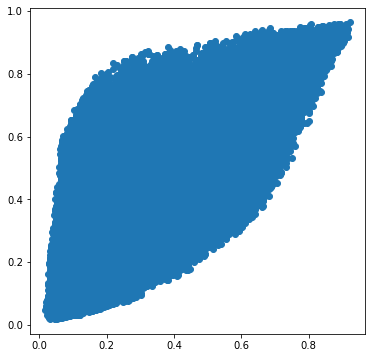

In [109]:
x_test_encoded = autoencoder.predict(x_test, batch_size=8)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], cmap='tab10')

plt.show()

In [110]:
top_10=[]

In [111]:
ooo=0

In [112]:
while ooo<10:
    top_10.append(arr[ooo])
    ooo+=1
    

In [113]:
print(top_10)

[0.61467767, 0.5602313, 0.62051624, 0.6434007, 0.5841105, 0.6330542, 0.63507384, 0.6091922, 0.535275, 0.5661938]


In [114]:
top_10=np.sort(top_10)

In [115]:
top_10=np.flip(top_10)

In [116]:
print(top_10)

[0.6434007  0.63507384 0.6330542  0.62051624 0.61467767 0.6091922
 0.5841105  0.5661938  0.5602313  0.535275  ]


C:\Users\Mehr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mehr\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


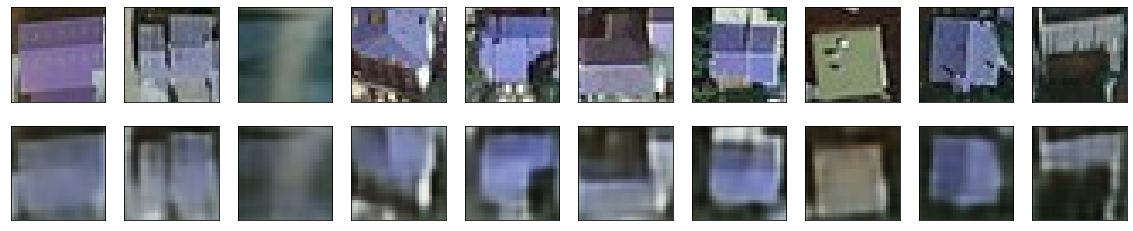

In [118]:

n=10
plt.figure(figsize=(20, 4))
for q4 in range(0, len(arr)):
    for i in range(0, n):
        if np.mean(tf.losses.binary_crossentropy(x_test[q4], decoded_imgs[q4]))==top_10[i]:
            
            
                # display original
                
                ax = plt.subplot(2, n, i + 1)
                plt.imshow(x_test[q4].reshape(28, 28, 3))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                
                
                # display reconstruction
                ax = plt.subplot(2, n, i + 1 + n)
                plt.imshow(decoded_imgs[q4].reshape(28, 28, 3))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
    
    
                

        
plt.show()  